In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np

**1. Understand the features of the dataset called Auto MPG that can be found here.
Download the dataset from this excel file. Here, the last feature, ‘car name’, has been removed.**

In [2]:
df = pd.read_excel('Auto_MPG.xlsx')
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1
394,44.0,4,97.0,52,2130,24.6,82,2
395,32.0,4,135.0,84,2295,11.6,82,1
396,28.0,4,120.0,79,2625,18.6,82,1


In [3]:
df.shape

(398, 8)

(a) For discrete attributes, apply a one-hot encoding and for non numeric ordinal attributes, apply integer mapping and save this in a file.


In [4]:
# inspect the structure etc.
print(df.info(), "\n")
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 25.0+ KB
None 

(398, 8)


In [5]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin'],
      dtype='object')

In [6]:
df['horsepower'].unique()

array([130, 165, 150, 140, 198, 220, 215, 225, 190, 170, 160, 95, 97, 85,
       88, 46, 87, 90, 113, 200, 210, 193, '?', 100, 105, 175, 153, 180,
       110, 72, 86, 70, 76, 65, 69, 60, 80, 54, 208, 155, 112, 92, 145,
       137, 158, 167, 94, 107, 230, 49, 75, 91, 122, 67, 83, 78, 52, 61,
       93, 148, 129, 96, 71, 98, 115, 53, 81, 79, 120, 152, 102, 108, 68,
       58, 149, 89, 63, 48, 66, 139, 103, 125, 133, 138, 135, 142, 77, 62,
       132, 84, 64, 74, 116, 82], dtype=object)

In [7]:
#there are no null values however horsepower has ? at some places. we can replace them with mean
c=0
mean = 0
for i in df['horsepower']:
  if i != '?':
    c = c+1
    mean = mean + i
mean = mean/c
df['horsepower'].replace('?', mean, inplace = True)

In [8]:
df['horsepower'].dtype

dtype('float64')

In [9]:
for i in df.columns:
  print(i , '===>' , len(df[i].unique()))

mpg ===> 129
cylinders ===> 5
displacement ===> 82
horsepower ===> 94
weight ===> 351
acceleration ===> 95
model year ===> 13
origin ===> 3


In [10]:
df1 = pd.get_dummies(df, columns = ['cylinders', 'model year', 'origin'])
df1

,mpg,displacement,horsepower,weight,acceleration,cylinders_3,cylinders_4,cylinders_5,cylinders_6,cylinders_8,...,model year_76,model year_77,model year_78,model year_79,model year_80,model year_81,model year_82,origin_1,origin_2,origin_3
0,18.0,307.0,130.0,3504,12.0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,15.0,350.0,165.0,3693,11.5,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,18.0,318.0,150.0,3436,11.0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,16.0,304.0,150.0,3433,12.0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,17.0,302.0,140.0,3449,10.5,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,140.0,86.0,2790,15.6,0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0
394,44.0,97.0,52.0,2130,24.6,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
395,32.0,135.0,84.0,2295,11.6,0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0
396,28.0,120.0,79.0,2625,18.6,0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [11]:
df1.to_excel("Q1_a_result.xlsx", index=False)

(b) Now, use the file you have saved in (a) and compute the mean  ̄x and variance σ2 of the data in it.

In [12]:
#count the number of null values in each column

for i in df.columns:
  print(i," ===> ",df[i].isnull().sum())

mpg  ===>  0
cylinders  ===>  0
displacement  ===>  0
horsepower  ===>  0
weight  ===>  0
acceleration  ===>  0
model year  ===>  0
origin  ===>  0


In [13]:
def mean(att):
  mean = 0
  for i in df1[att]:
      mean = mean + i
  mean = mean/df1.shape[0]

  return mean


In [14]:
def vardev(att, val):
  var = 0
  for i in df1[att]:
    var = var + (i-val)**2

  var = var/df1.shape[0]

  return var

In [15]:
mean_arr = {}
for i in df1.columns:
  temp = mean(i);
  mean_arr[i] = temp

mean_arr

{'mpg': 23.514572864321615,
 'displacement': 193.42587939698493,
 'horsepower': 104.46938775510206,
 'weight': 2970.424623115578,
 'acceleration': 15.568090452261291,
 'cylinders_3': 0.010050251256281407,
 'cylinders_4': 0.5125628140703518,
 'cylinders_5': 0.007537688442211055,
 'cylinders_6': 0.21105527638190955,
 'cylinders_8': 0.25879396984924624,
 'model year_70': 0.0728643216080402,
 'model year_71': 0.07035175879396985,
 'model year_72': 0.07035175879396985,
 'model year_73': 0.10050251256281408,
 'model year_74': 0.0678391959798995,
 'model year_75': 0.07537688442211055,
 'model year_76': 0.08542713567839195,
 'model year_77': 0.07035175879396985,
 'model year_78': 0.09045226130653267,
 'model year_79': 0.0728643216080402,
 'model year_80': 0.0728643216080402,
 'model year_81': 0.0728643216080402,
 'model year_82': 0.07788944723618091,
 'origin_1': 0.6256281407035176,
 'origin_2': 0.17587939698492464,
 'origin_3': 0.1984924623115578}

In [16]:
var_arr = {}
for i in df1.columns:
  temp = vardev(i, mean_arr[i])
  var_arr[i] = temp

var_arr

{'mpg': 60.93611928991693,
 'displacement': 10844.882068950259,
 'horsepower': 1455.5116398318166,
 'weight': 715339.1287404363,
 'acceleration': 7.585740574732961,
 'cylinders_3': 0.009949243705967031,
 'cylinders_4': 0.2498421757026331,
 'cylinders_5': 0.007480871695159248,
 'cylinders_6': 0.16651094669326397,
 'cylinders_8': 0.19181965101891388,
 'model year_70': 0.06755511224464028,
 'model year_71': 0.06540238882856562,
 'model year_72': 0.06540238882856558,
 'model year_73': 0.09040175753137489,
 'model year_74': 0.0632370394687012,
 'model year_75': 0.06969520971692582,
 'model year_76': 0.07812934016817805,
 'model year_77': 0.06540238882856525,
 'model year_78': 0.08227064973106776,
 'model year_79': 0.06755511224464027,
 'model year_80': 0.06755511224464027,
 'model year_81': 0.06755511224464027,
 'model year_82': 0.07182268124542314,
 'origin_1': 0.23421757026337828,
 'origin_2': 0.14494583470114322,
 'origin_3': 0.15909320471705204}

(c) You might notice that the variance of the data is highly dominated by few
features compared to other features. So, normalize each feature of the saved
data with its mean and variance. Now compute the variance of the normalized
data.

In [17]:
for i in ['displacement', 'horsepower', 'weight']:
  df1[i] = (df1[i]- mean_arr[i])/((var_arr[i])**0.5)

In [18]:
mean_arr_norm = {}
for i in df1.columns:
  temp = mean(i)
  mean_arr_norm[i] = temp

mean_arr_norm

{'mpg': 23.514572864321615,
 'displacement': -1.2050661975830845e-16,
 'horsepower': -4.747737658070394e-16,
 'weight': -1.3947525434989403e-17,
 'acceleration': 15.568090452261291,
 'cylinders_3': 0.010050251256281407,
 'cylinders_4': 0.5125628140703518,
 'cylinders_5': 0.007537688442211055,
 'cylinders_6': 0.21105527638190955,
 'cylinders_8': 0.25879396984924624,
 'model year_70': 0.0728643216080402,
 'model year_71': 0.07035175879396985,
 'model year_72': 0.07035175879396985,
 'model year_73': 0.10050251256281408,
 'model year_74': 0.0678391959798995,
 'model year_75': 0.07537688442211055,
 'model year_76': 0.08542713567839195,
 'model year_77': 0.07035175879396985,
 'model year_78': 0.09045226130653267,
 'model year_79': 0.0728643216080402,
 'model year_80': 0.0728643216080402,
 'model year_81': 0.0728643216080402,
 'model year_82': 0.07788944723618091,
 'origin_1': 0.6256281407035176,
 'origin_2': 0.17587939698492464,
 'origin_3': 0.1984924623115578}

In [19]:
var_arr_norm = {}
for i in df1.columns:
  temp = vardev(i, mean_arr_norm[i])
  var_arr_norm[i] = temp

var_arr_norm

{'mpg': 60.93611928991693,
 'displacement': 1.0000000000000002,
 'horsepower': 0.9999999999999981,
 'weight': 0.9999999999999994,
 'acceleration': 7.585740574732961,
 'cylinders_3': 0.009949243705967031,
 'cylinders_4': 0.2498421757026331,
 'cylinders_5': 0.007480871695159248,
 'cylinders_6': 0.16651094669326397,
 'cylinders_8': 0.19181965101891388,
 'model year_70': 0.06755511224464028,
 'model year_71': 0.06540238882856562,
 'model year_72': 0.06540238882856558,
 'model year_73': 0.09040175753137489,
 'model year_74': 0.0632370394687012,
 'model year_75': 0.06969520971692582,
 'model year_76': 0.07812934016817805,
 'model year_77': 0.06540238882856525,
 'model year_78': 0.08227064973106776,
 'model year_79': 0.06755511224464027,
 'model year_80': 0.06755511224464027,
 'model year_81': 0.06755511224464027,
 'model year_82': 0.07182268124542314,
 'origin_1': 0.23421757026337828,
 'origin_2': 0.14494583470114322,
 'origin_3': 0.15909320471705204}

**2. For n points {x1, x2, . . . , xn} its variance is σ2, where ̄x is the mean. Consider a population, consists of 1,00,000 points uniformly distributed between 0.01 and 1000; for example, your population will be D = {0.01, 0.02, 0.03, . . . , 1000}.**

In [20]:
i = 0.01
dataset = []
while i <= 1000:
  dataset.append(i)
  i = round(i+0.01, 2)

len(dataset)

100000

(a) Compute σ2 of the population D. Let’s call σ2 the true variance of the population D.

In [21]:
true_mean = 0
for i in dataset:
  true_mean = true_mean + i

true_mean = true_mean/len(dataset)
true_mean

500.005

In [22]:
true_var = 0
for i in dataset:
  true_var = true_var + (i - true_mean)**2

true_var = true_var/len(dataset)
true_var

83333.333325

(b) Use sampling with replacement, to randomly sample 50 points {y1, . . . , y50} from the population D, i.e., for 1 ≤ i ≤ 50, yi ∈ D. Compute s1^2, s2^2 & s3^2

In [23]:
import random

In [24]:
sample = random.sample(dataset, 50)

In [25]:
sample_mean = 0
for i in sample:
  sample_mean = sample_mean + i

sample_mean = sample_mean/50
sample_mean

492.81019999999995

In [26]:
sample_var = 0
for i in sample:
  sample_var = sample_var + (i - sample_mean)**2

sample_var = sample_var
sample_var

3963551.0386980013

In [27]:
s1 = sample_var/51
s1

77716.68703329415

In [28]:
s2 = sample_var/50
s2

79271.02077396003

In [29]:
s3 = sample_var/49
s3

80888.79670812248

(c) Repeat (b) for multiple iterations and maintain the average scores

In [30]:
def add(l):
  temp = 0
  for i in l:
    temp = temp + i

  return temp

In [31]:
def question_2c():
  s1_arr = []
  s2_arr = []
  s3_arr = []
  avg_s1 = []
  avg_s2 = []
  avg_s3 = []

  for i in range(3000):
    sample = random.sample(dataset, 50)

    sample_mean = 0
    for i in sample:
      sample_mean = sample_mean + i

    sample_mean = sample_mean/50
    sample_mean

    sample_var = 0


    for i in sample:
      sample_var = sample_var + (i - sample_mean)**2

    sample_var = sample_var
    sample_var

    s1 = sample_var/51
    s2 = sample_var/50
    s3 = sample_var/49

    s1_arr.append(s1)
    s2_arr.append(s2)
    s3_arr.append(s3)

    avg1 = add(s1_arr)/len(s1_arr)
    avg2 = add(s2_arr)/len(s2_arr)
    avg3 = add(s3_arr)/len(s3_arr)

    avg_s1.append(avg1)
    avg_s2.append(avg2)
    avg_s3.append(avg3)

  return avg_s1, avg_s2, avg_s3

In [32]:
avg_s1, avg_s2, avg_s3 = question_2c()
i = 0
print('avg_s1','avg_s2','avg_s3' , sep='\t\t\t\t')
for a,b,c in zip(avg_s1, avg_s2, avg_s3):
    if i == 10:
      break
    i = i+1
    print(a,b,c , sep='\t\t')

avg_s1				avg_s2				avg_s3
94192.04418368626		96075.88506736		98036.61741567346
80977.2493547647		82596.79434186		84282.4432059796
78101.07167253595		79663.09310598667		81288.87051631293
80022.74577051961		81623.20068593		83288.98029176531
80119.68437293333		81722.078060392		83389.87557182857
82131.15026473856		83773.77327003334		85483.4421122789
81916.3105905042		83554.63680231429		85259.83347174928
83070.12795555883		84731.53051467		86460.74542313266
81508.40290195208		83138.5709599911		84835.27648978686
80265.55395136471		81870.86503039199		83541.69901060409


(d) Use three different scatter plots to visualize the change in Avgsi^2, for 1 ≤ i ≤ 3 over increasing number of iterations and compare it with σ^2 the true variance of D.

In [39]:
x =[]
for i in range(1, 3001):
  x.append(i)

In [37]:
# s1_avg = []
# s2_avg = []
# s3_avg = []
# for i in range(0, 3000, 6):
#   s1_avg.append(avg_s1[i])
#   s2_avg.append(avg_s2[i])
#   s3_avg.append(avg_s3[i])

# print(len(s1_avg))

500


<ipython-input-40-8c595e3b44db>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 3, 1)


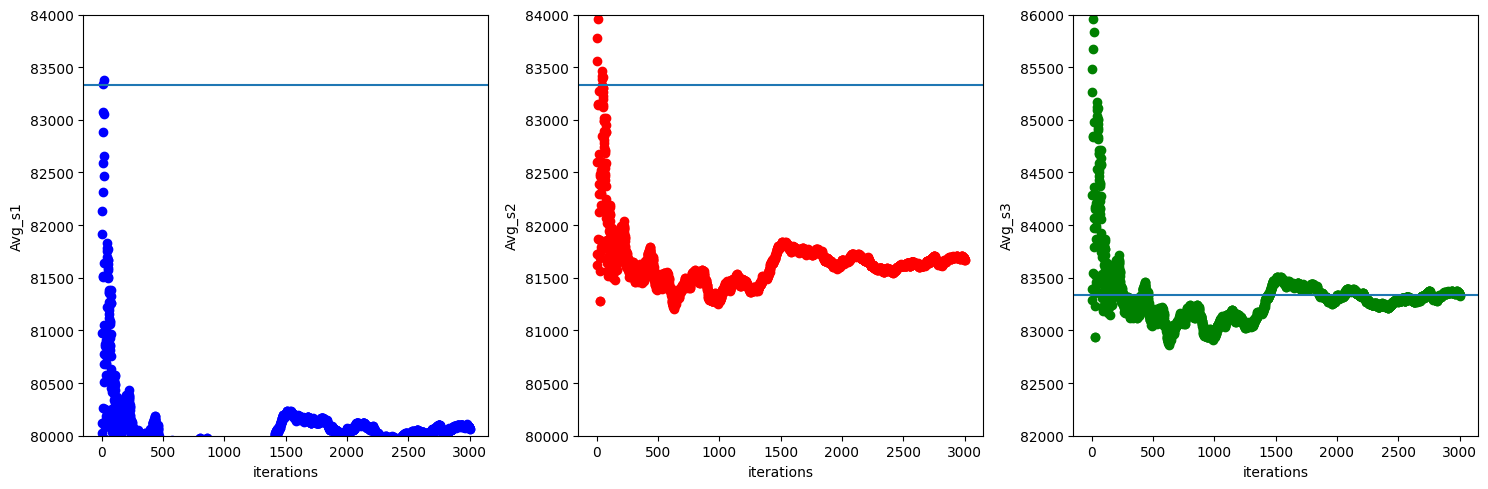

In [40]:
plt.subplots(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(x, avg_s1, c ="blue")
plt.xlabel("iterations")
plt.ylabel("Avg_s1")
plt.axhline(y=true_var)
plt.ylim([80000, 84000])

plt.subplot(1, 3, 2)
plt.scatter(x, avg_s2, c ="red")
plt.xlabel("iterations")
plt.ylabel("Avg_s2")
plt.axhline(y=true_var)
plt.ylim([80000, 84000])

plt.subplot(1, 3, 3)
plt.scatter(x, avg_s3, c ="green")
plt.xlabel("iterations")
plt.ylabel("Avg_s3")
plt.axhline(y=true_var)
plt.ylim([82000, 86000])

plt.tight_layout()
plt.show()

(e) Repeat (b), (c) & (d) multiple times and notice among Avgs1^2, Avgs2^2 and Avgs3^2 which score approaches to the true variance much quickly or frequently. Argue its reason.

<ipython-input-41-761ad3addfcb>:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 3, 1)


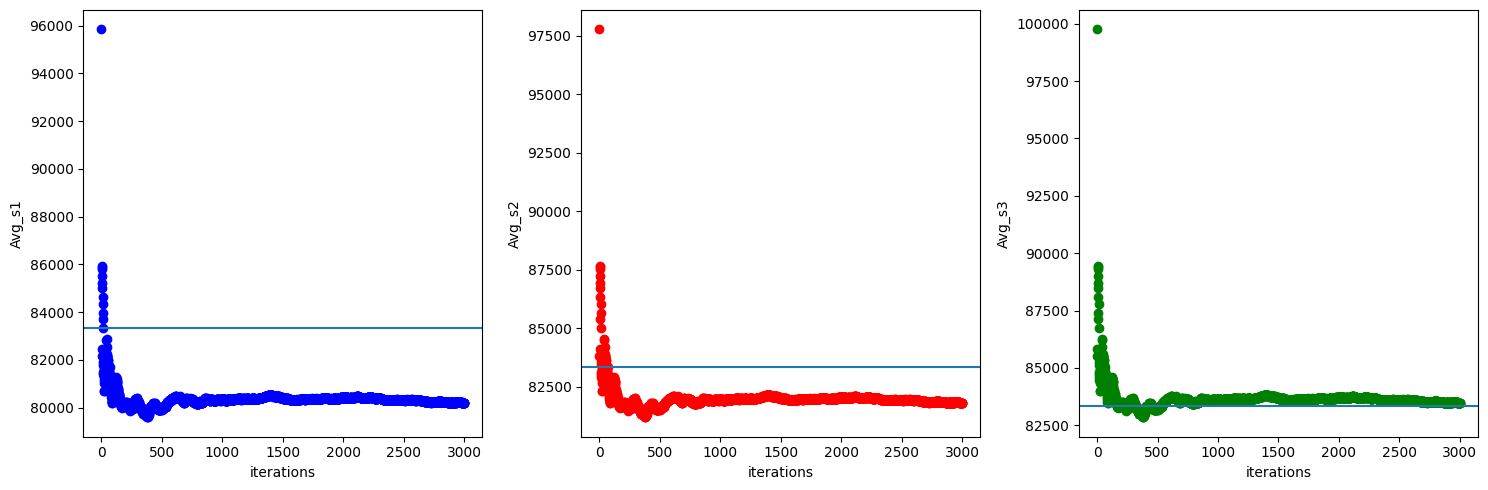

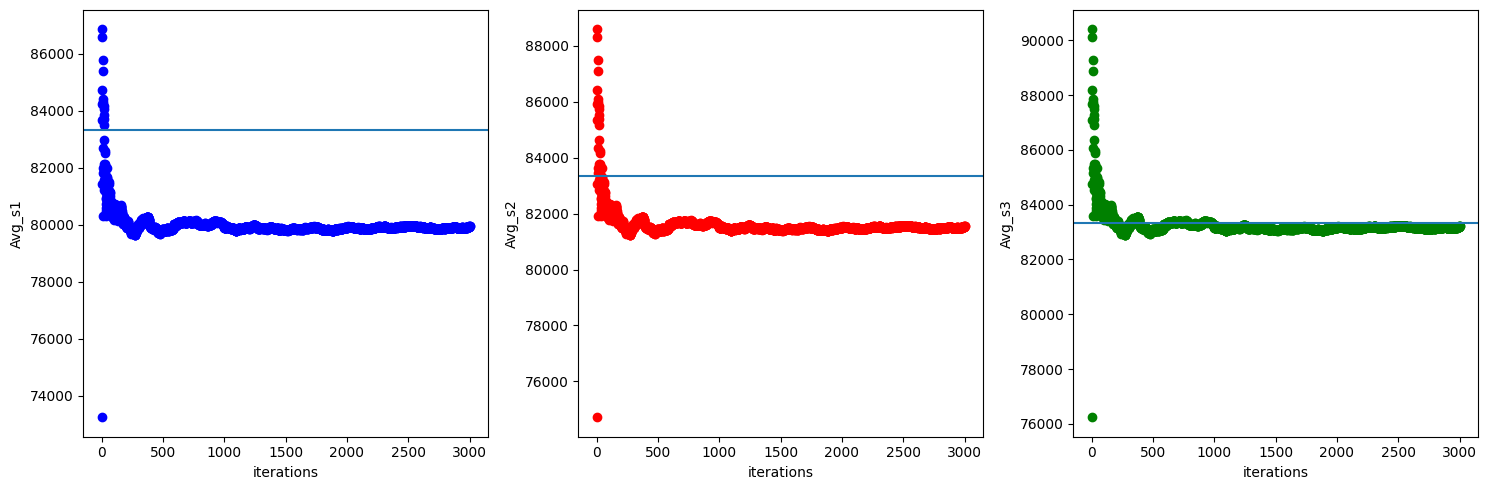

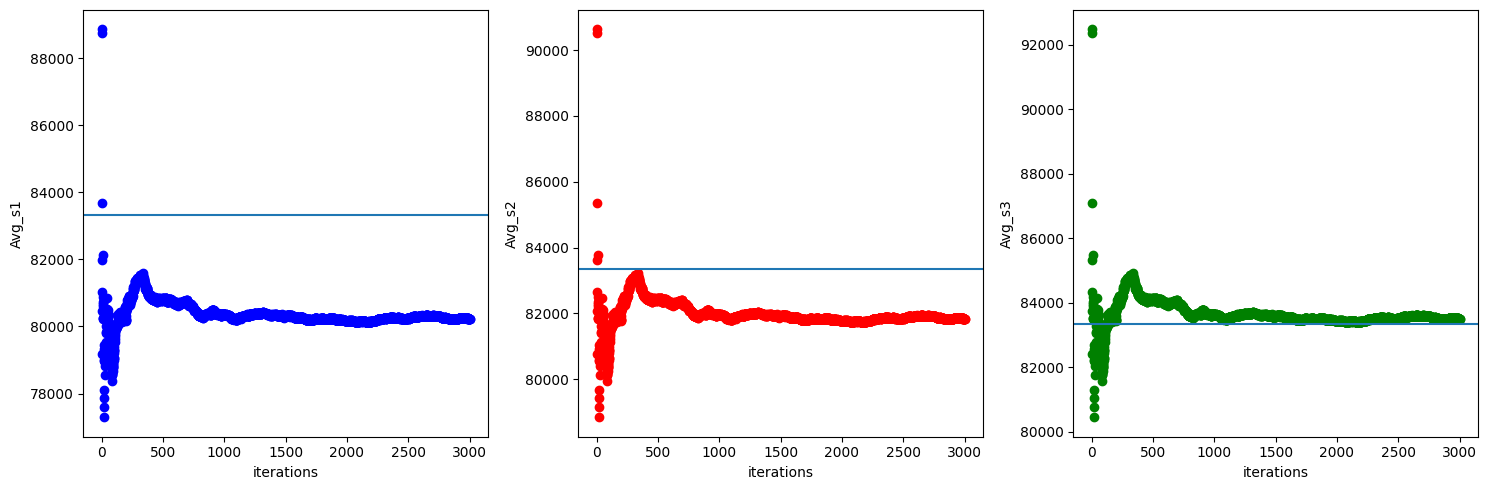

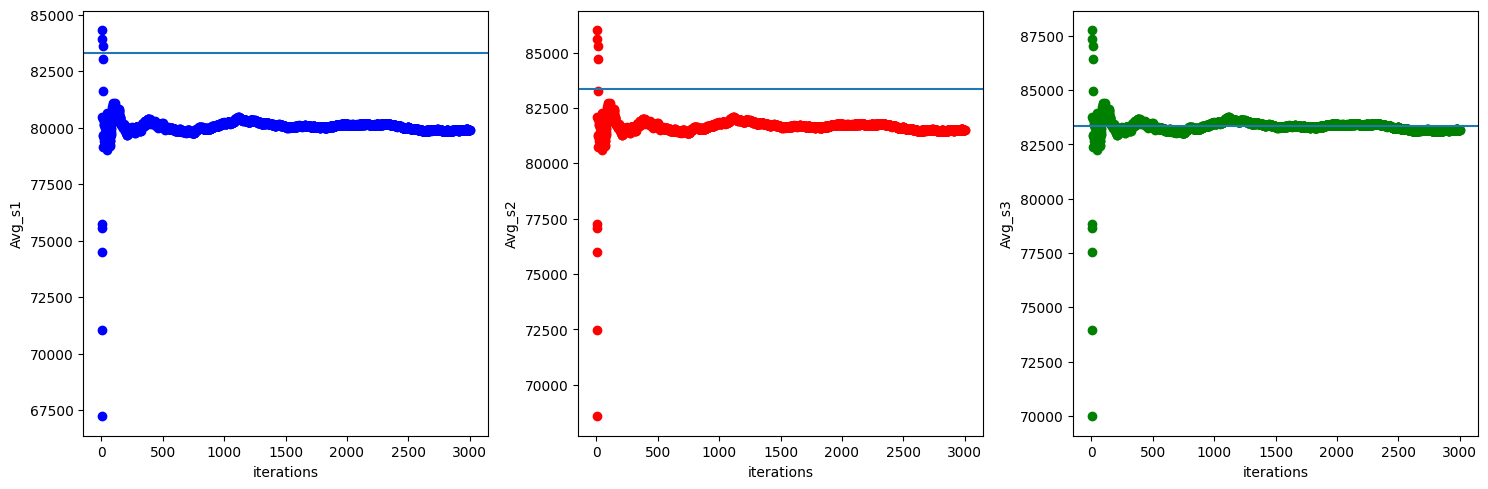

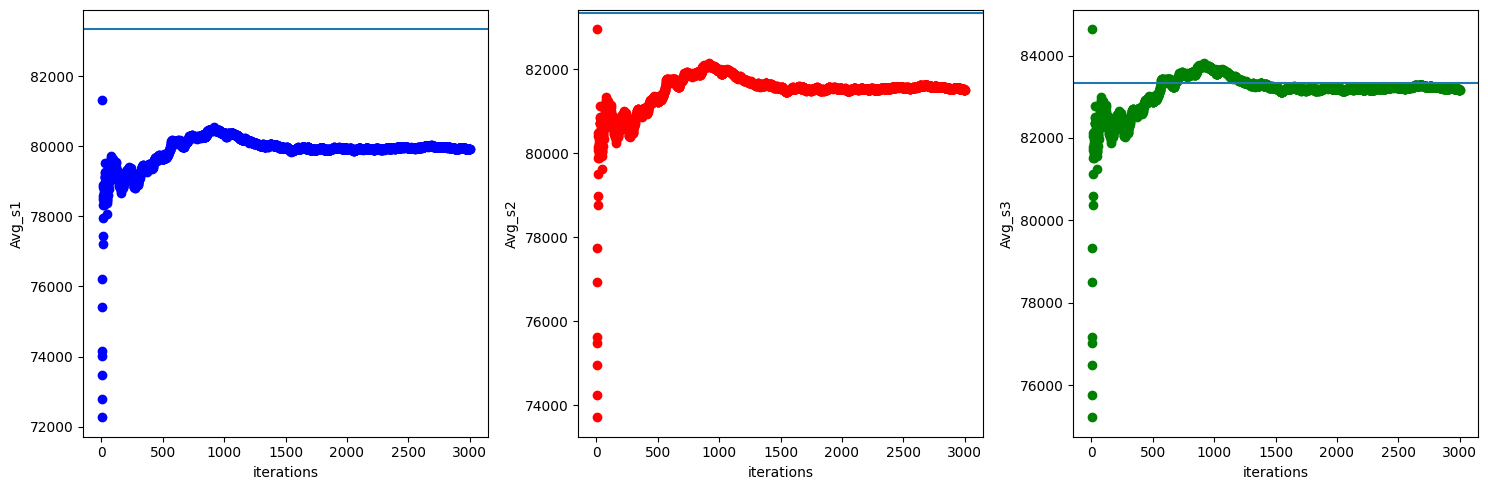

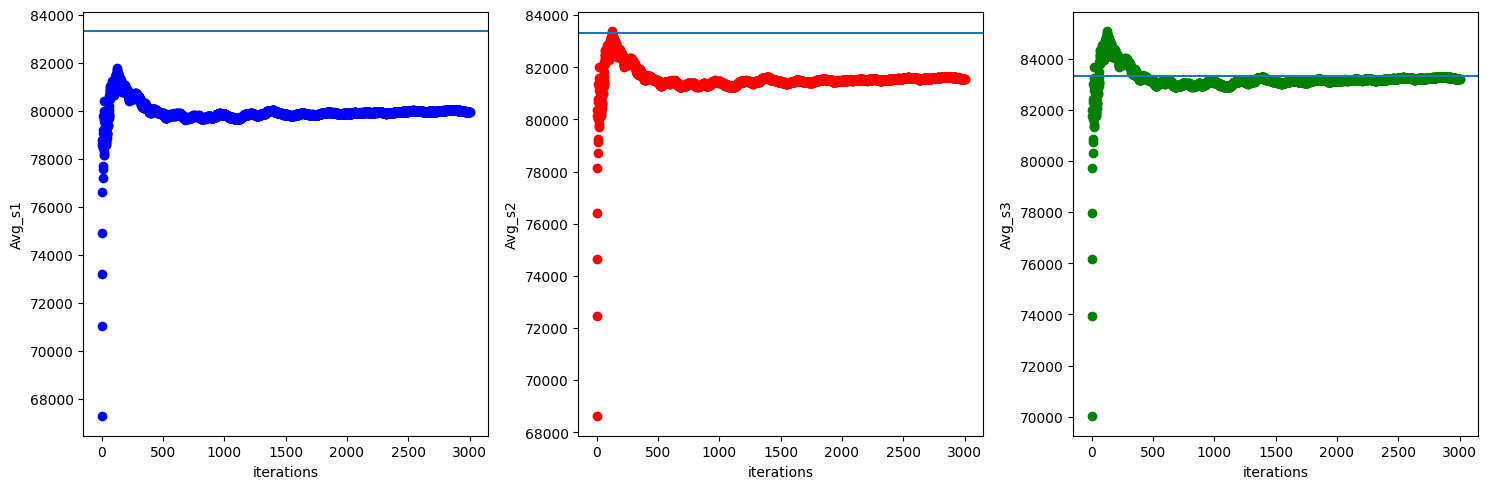

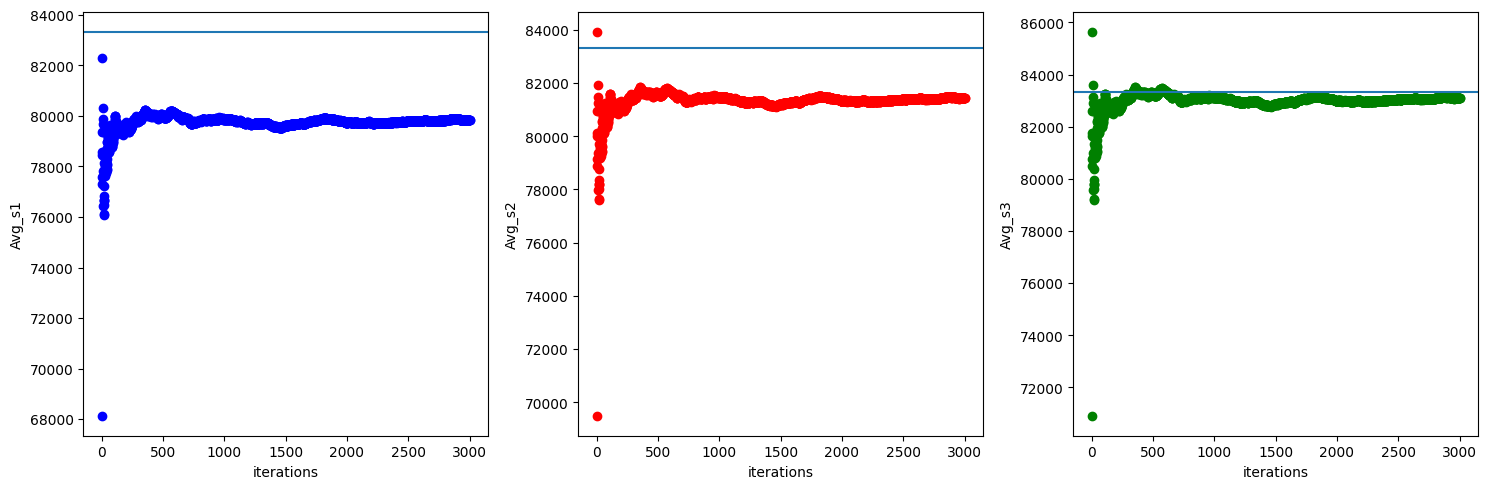

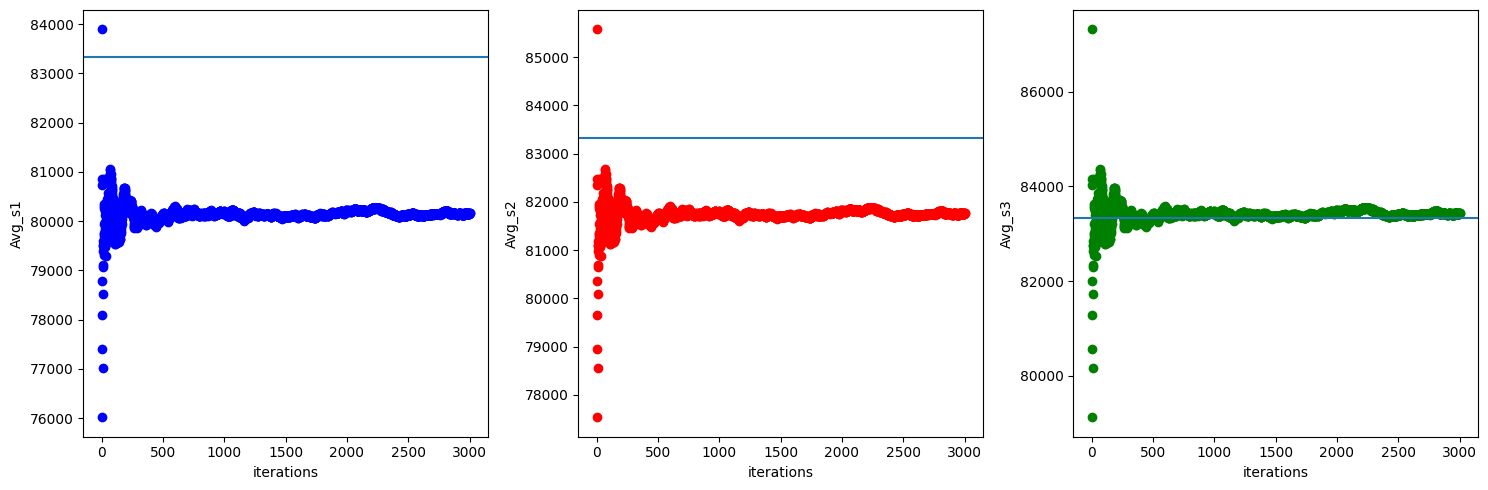

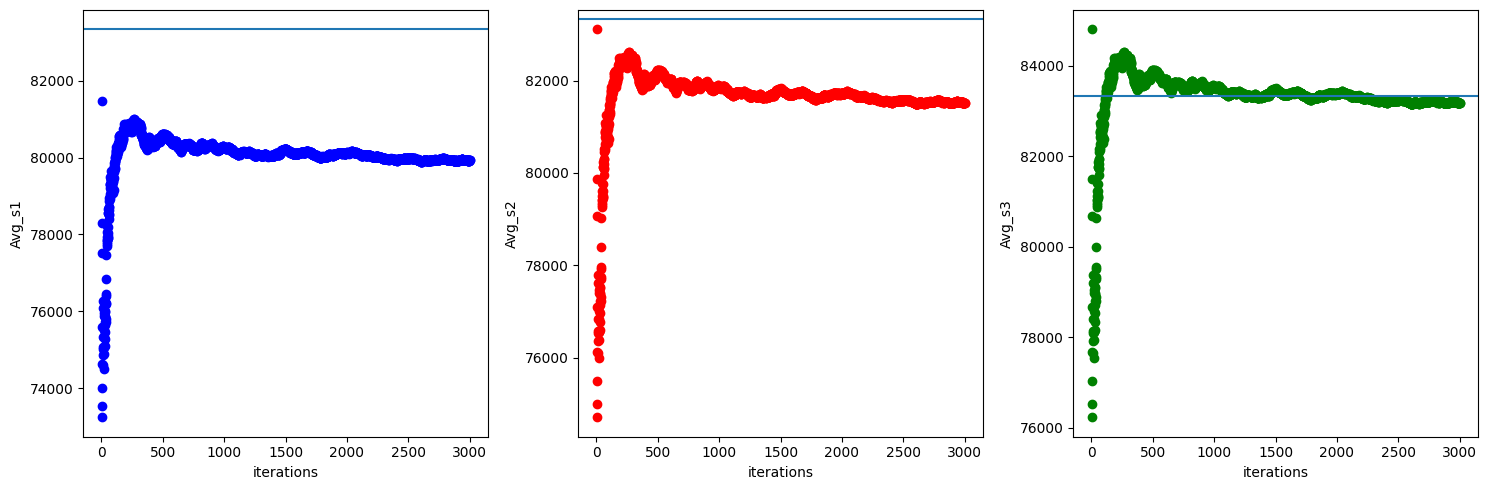

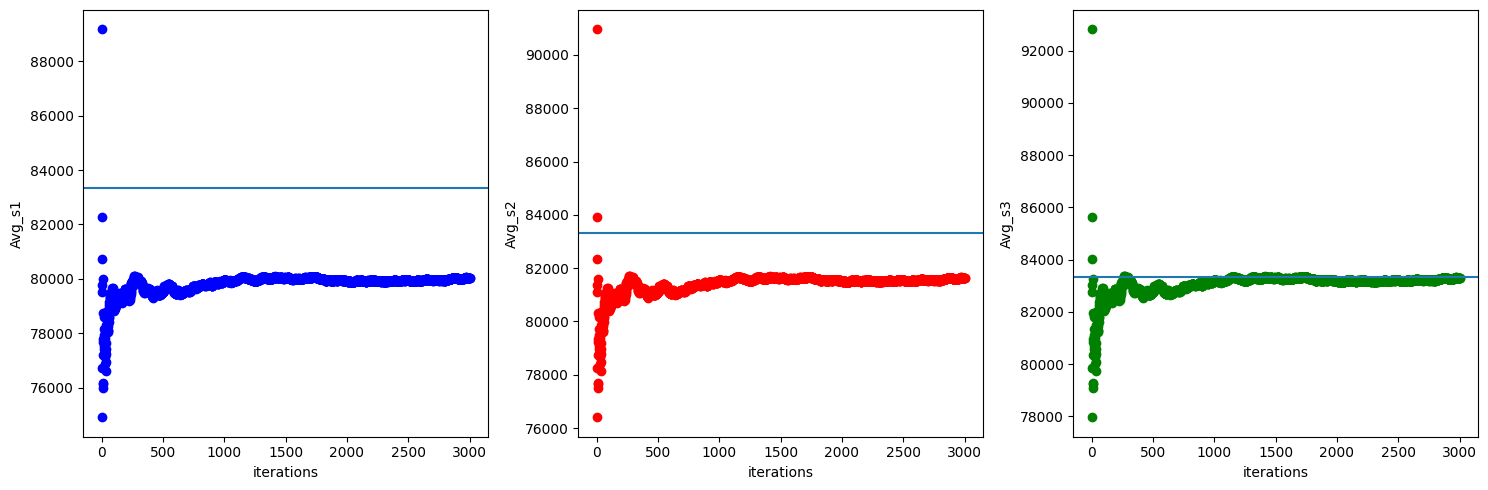

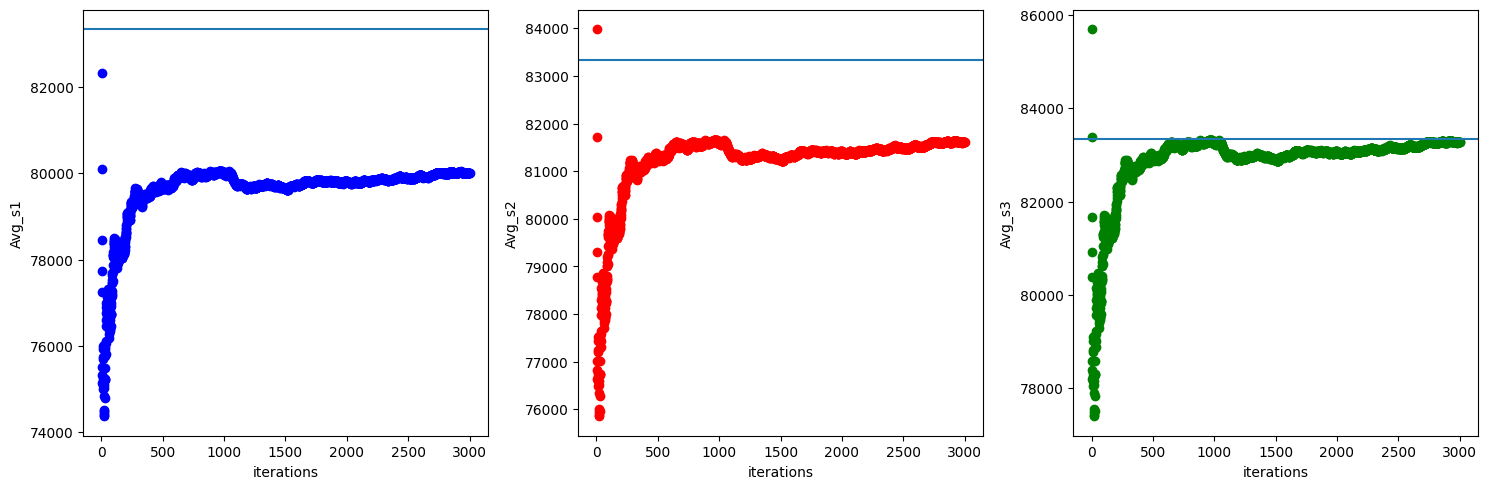

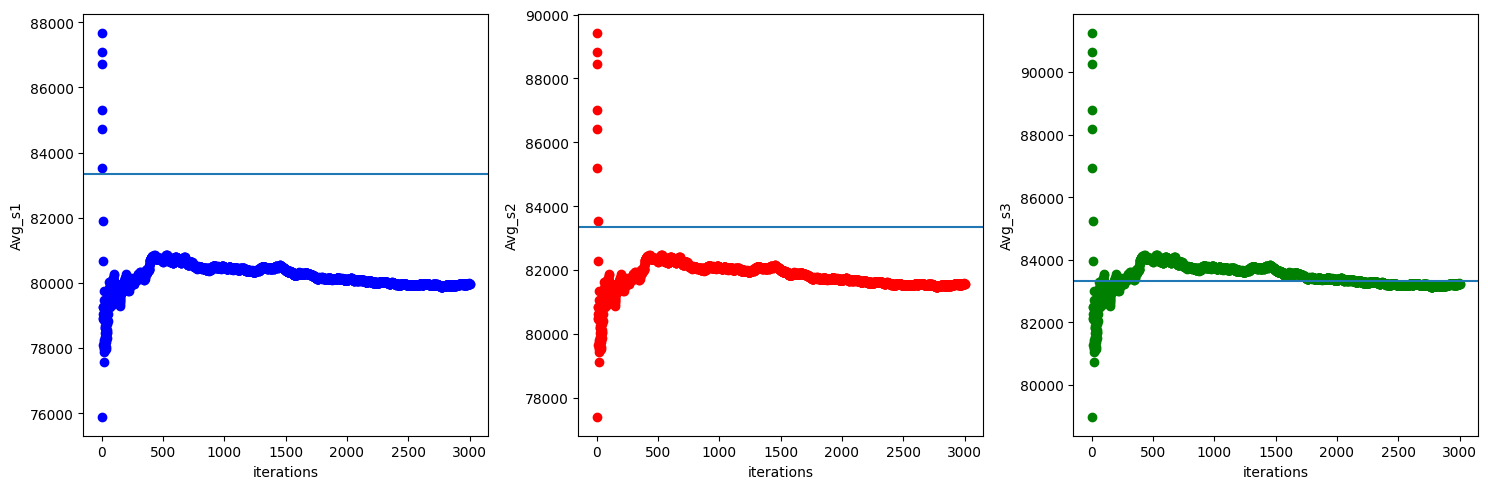

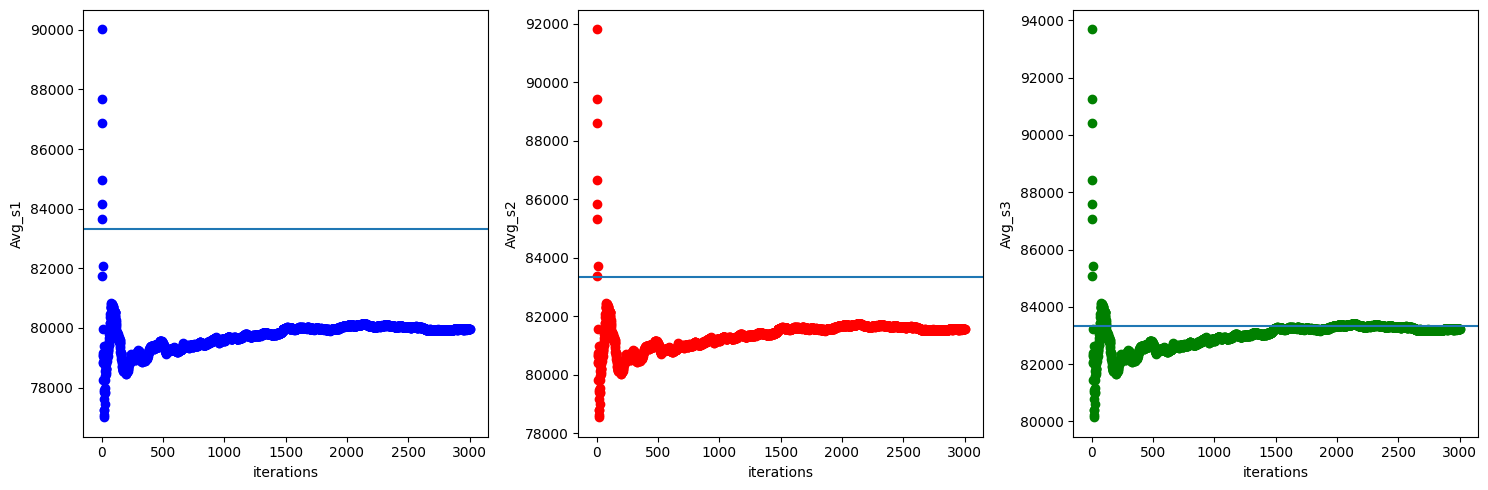

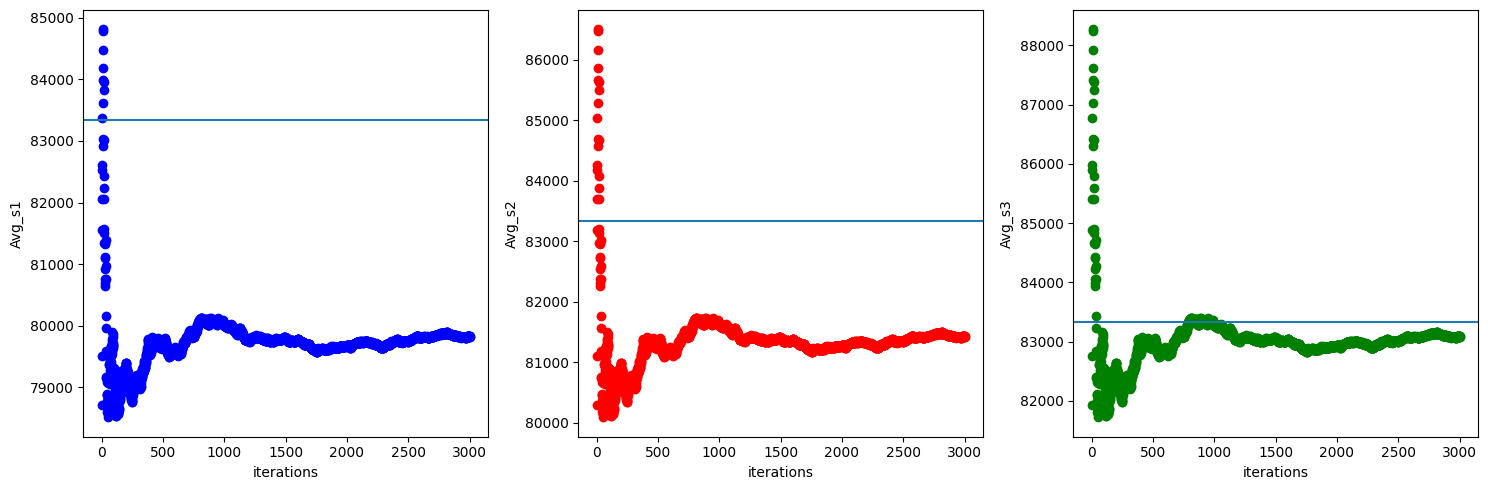

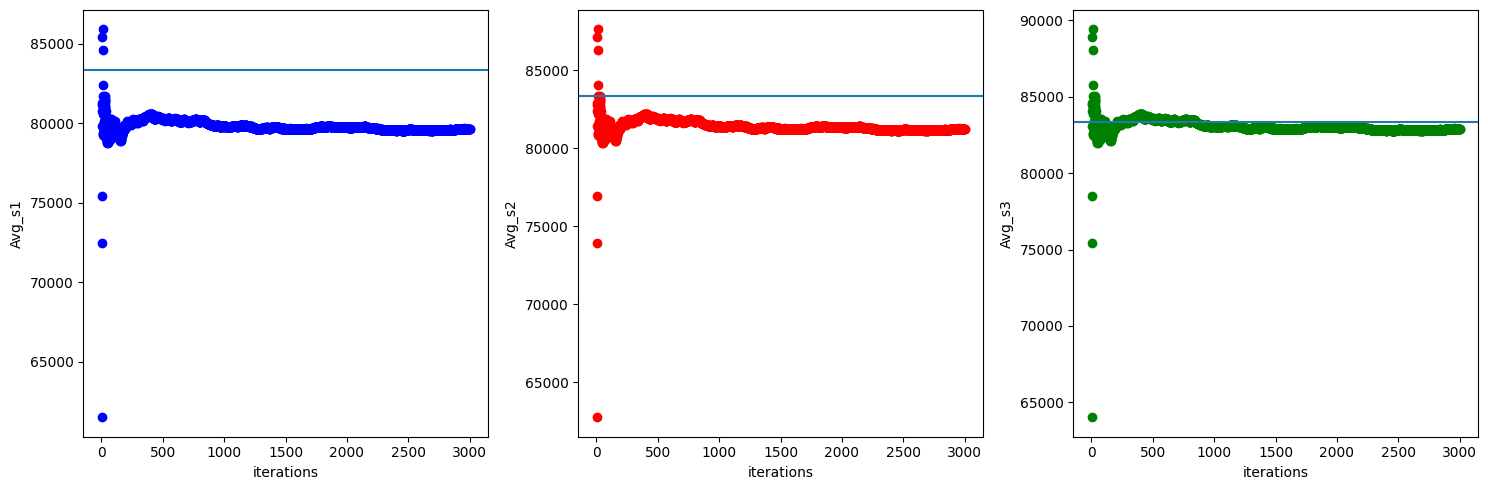

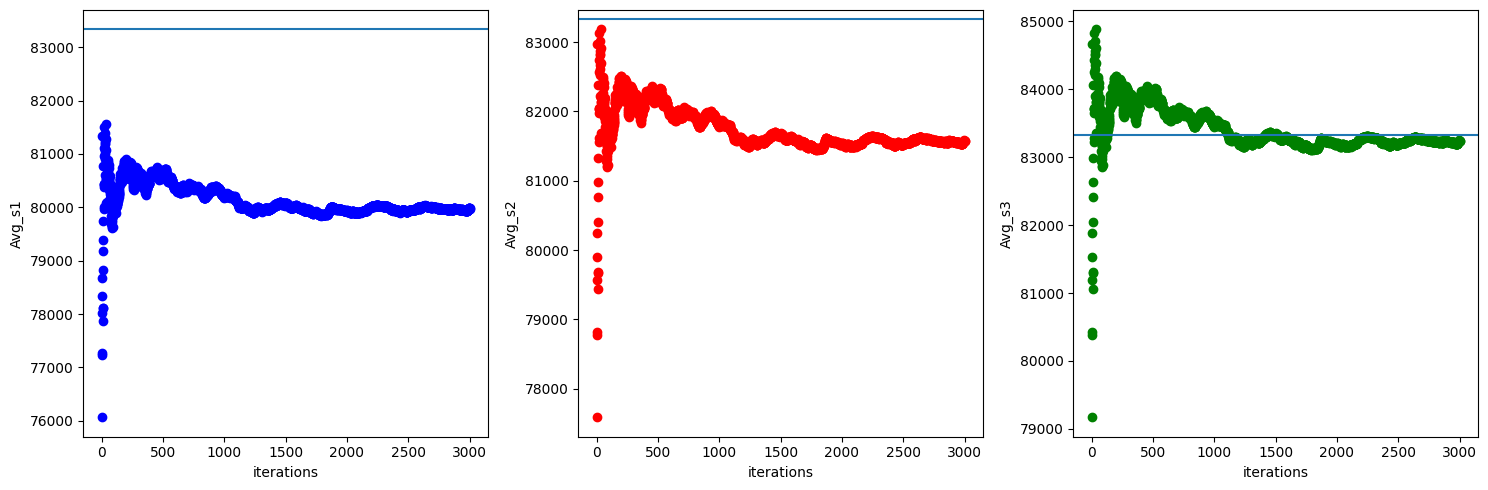

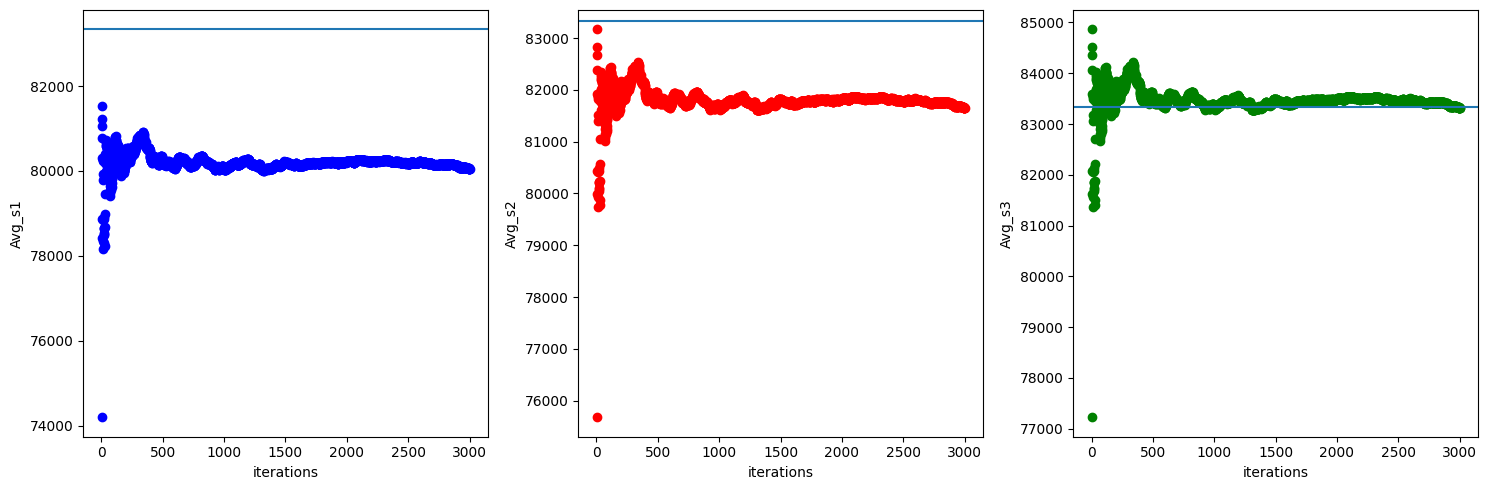

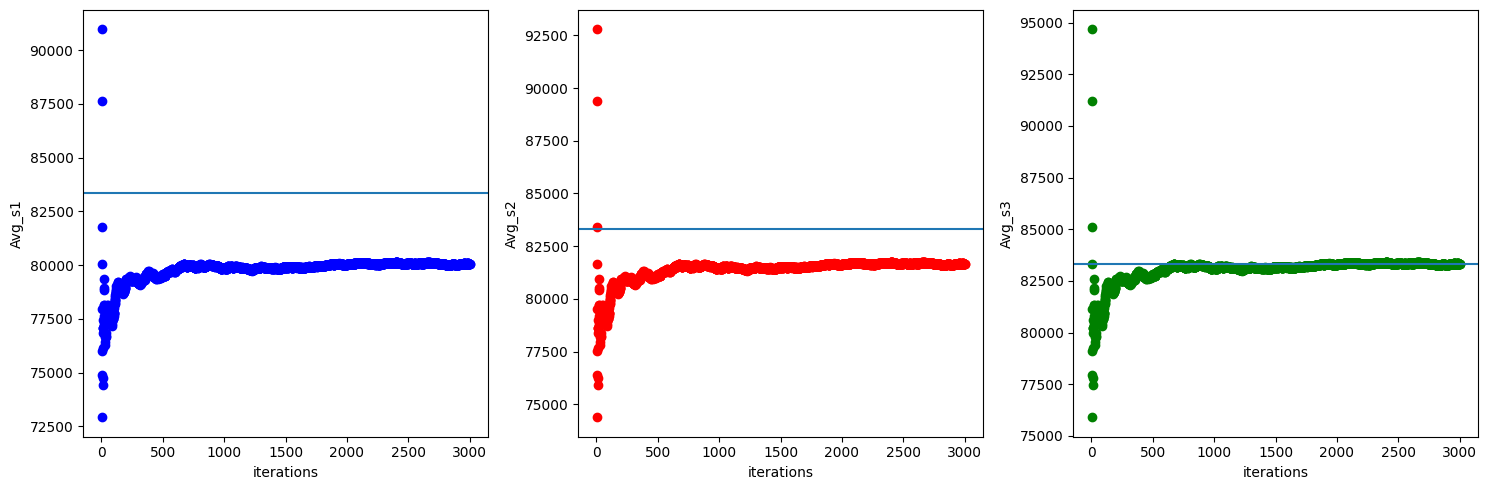

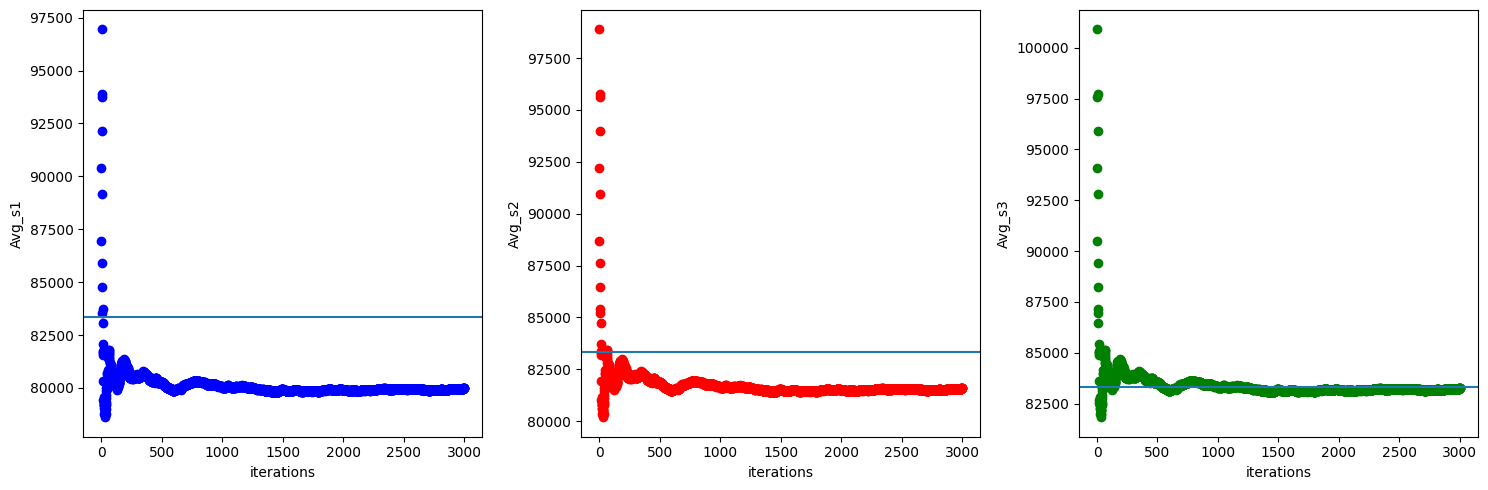

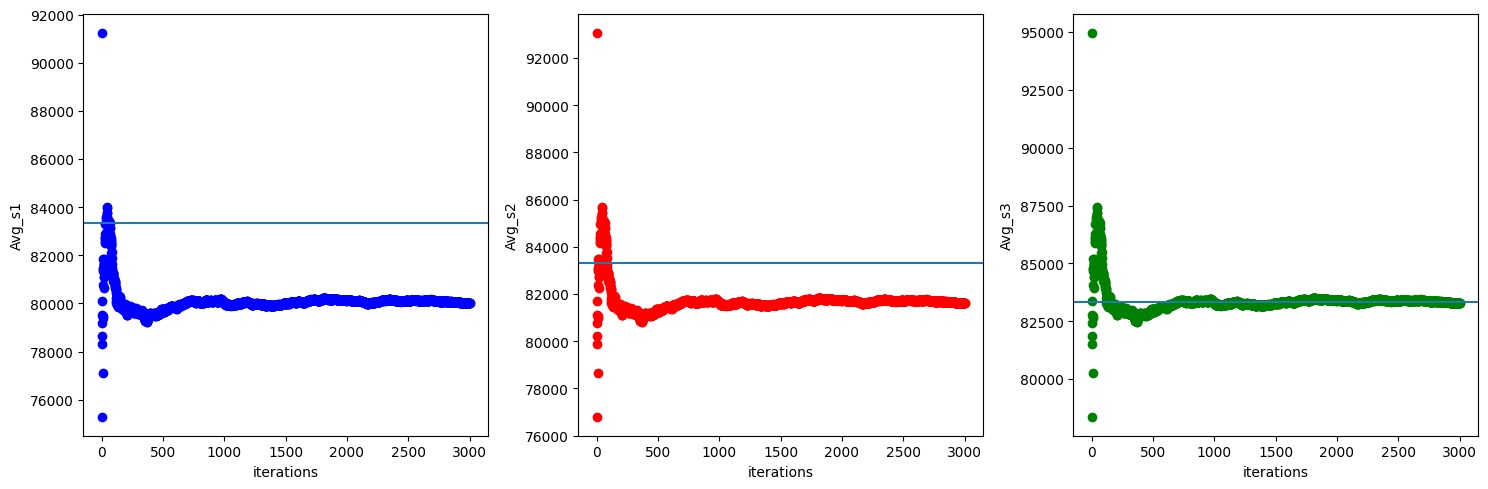

In [41]:
x =[]
for i in range(1, 3001):
  x.append(i)

for i in range(20):
  avg_s1, avg_s2, avg_s3 = question_2c()

  plt.subplots(figsize=(15, 5))

  plt.subplot(1, 3, 1)
  plt.scatter(x, avg_s1, c ="blue")
  plt.xlabel("iterations")
  plt.ylabel("Avg_s1")
  plt.axhline(y=true_var)
  # plt.ylim([80000, 84000])

  plt.subplot(1, 3, 2)
  plt.scatter(x, avg_s2, c ="red")
  plt.xlabel("iterations")
  plt.ylabel("Avg_s2")
  plt.axhline(y=true_var)
  # plt.ylim([80000, 84000])

  plt.subplot(1, 3, 3)
  plt.scatter(x, avg_s3, c ="green")
  plt.xlabel("iterations")
  plt.ylabel("Avg_s3")
  plt.axhline(y=true_var)
  # plt.ylim([82000, 86000])

  plt.tight_layout()
  plt.show()


There is high difference between the true variance that we calculated and the avgerage varience that we are calculating at every iteration

Avg_s1 has the highest difference amongst all there, where as Avg_s3 is the most closest to the true_varience as it converges to approximately same as true variance



**4. There is a biased k-faced die, numbered 1 to k. The probability that the upward face is i from a random roll is 1/2^i−1 for 2 ≤ i ≤ k and probability that upward face is 1 is 1/2^k−1. So, P(1) = P(k) = 1/2^k−1, P(2) = 1/2, P(3) = 1/4 and so on.**

(a) Consider k = 4 and randomly roll the die 4 times and calculate the sum of the upward face value. Repeat this task for 1000 times and plot a frequency distribution histogram. Compute the Bowley’s coefficient of the observed sample.

In [59]:
k=4
p=[0,0,0,0]
p[0] = 1/(2**(k-1))
p[1] = 1/2
p[2] = 1/4
p[3] = 1/(2**(k-1))
for i in range(0,k):
  print('P(',i+1,') ===> ' ,p[i])


P( 1 ) ===>  0.125
P( 2 ) ===>  0.5
P( 3 ) ===>  0.25
P( 4 ) ===>  0.125


In [60]:
import random


In [61]:
def roll_dice_4_times():
  res = random.choices([1,2,3,4], weights=p, k=4)
  # print(res)
  temp = 0
  for i in res:
    temp= temp+i

  return temp

In [62]:
print("sum ===> ", roll_dice_4_times())

sum ===>  8


In [63]:
res = []
for i in range(0, 1000):
  sum = roll_dice_4_times()
  res.append(sum)

print("size of experiment ===>", len(res))
print("minimum value from our experiment ===>" ,min(res))
print("maximum value from our experiment ===>" ,max(res))

size of experiment ===> 1000
minimum value from our experiment ===> 5
maximum value from our experiment ===> 16


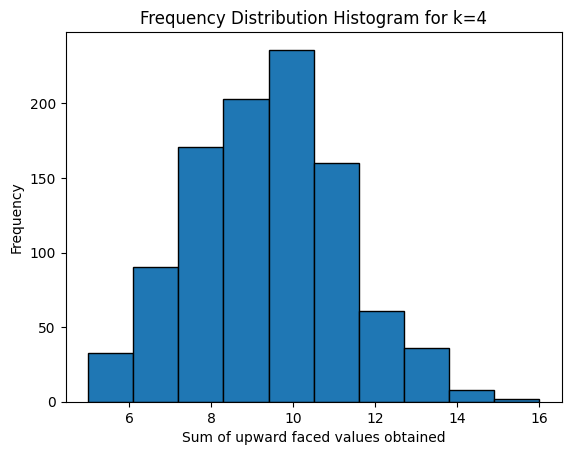

In [64]:
plt.hist(res, bins=10, edgecolor='black')
plt.title("Frequency Distribution Histogram for k=4")
plt.xlabel("Sum of upward faced values obtained")
plt.ylabel("Frequency")
plt.show()

In [65]:
interquatile_range = pd.DataFrame(res).quantile([0.25, 0.5, 0.75])
q1 = interquatile_range[0][0.25]
q2 = interquatile_range[0][0.5]
q3 = interquatile_range[0][0.75]

res = sorted(res)
med = np.median(res)

coeff = (q1 + q3 - 2*med)/(q3 - q1)
coeff

-0.3333333333333333

(b) For the same k = 4, now randomly roll the die 8 times and calculate the sum of the upward face value. Repeat this task for 1000 times and plot a frequency distribution histogram. Compute the bowley’s coefficient of the observed sample.

In [66]:
def roll_dice_8_times():
  res = random.choices([1,2,3,4], weights=p, k=8)
  # print(res)
  temp = 0
  for i in res:
    temp= temp+i

  return temp

In [67]:
print("sum ===> ", roll_dice_8_times())

sum ===>  18


In [68]:
res = []
for i in range(0, 1000):
  sum = roll_dice_8_times()
  res.append(sum)

print("size of experiment ===>", len(res))
print("minimum value from our experiment ===>" ,min(res))
print("maximum value from our experiment ===>" ,max(res))

size of experiment ===> 1000
minimum value from our experiment ===> 12
maximum value from our experiment ===> 26


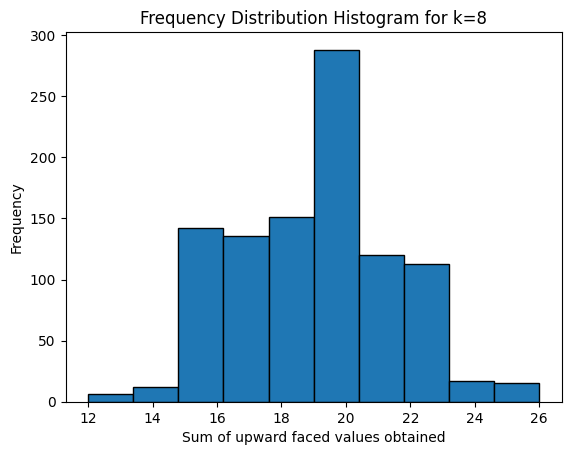

In [69]:
plt.hist(res, bins=10, edgecolor='black')
plt.title("Frequency Distribution Histogram for k=8")
plt.xlabel("Sum of upward faced values obtained")
plt.ylabel("Frequency")
plt.show()

In [70]:
interquatile_range = pd.DataFrame(res).quantile([0.25, 0.5, 0.75])
q1 = interquatile_range[0][0.25]
q2 = interquatile_range[0][0.5]
q3 = interquatile_range[0][0.75]

res = sorted(res)
med = np.median(res)

coeff = (q1 + q3 - 2*med)/(q3 - q1)
coeff

0.0

(c) Repeat (a) for k = 16. Argue the observed changed in the Bowley’s coefficient for all the three cases.

In [71]:
def roll_dice_16_times():
  res = random.choices([1,2,3,4], weights=p, k=16)
  # print(res)
  temp = 0
  for i in res:
    temp= temp+i

  return temp

In [72]:
print("sum ===> ", roll_dice_16_times())

sum ===>  32


In [73]:
res = []
for i in range(0, 1000):
  sum = roll_dice_16_times()
  res.append(sum)

print("size of experiment ===>", len(res))
print("minimum value from our experiment ===>" ,min(res))
print("maximum value from our experiment ===>" ,max(res))

size of experiment ===> 1000
minimum value from our experiment ===> 28
maximum value from our experiment ===> 49


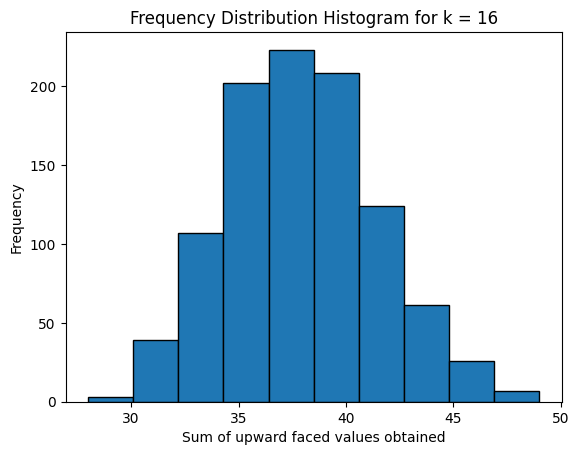

In [74]:
plt.hist(res, bins=10, edgecolor='black')
plt.title("Frequency Distribution Histogram for k = 16")
plt.xlabel("Sum of upward faced values obtained")
plt.ylabel("Frequency")
plt.show()

In [75]:
interquatile_range = pd.DataFrame(res).quantile([0.25, 0.5, 0.75])
q1 = interquatile_range[0][0.25]
q2 = interquatile_range[0][0.5]
q3 = interquatile_range[0][0.75]

res = sorted(res)
med = np.median(res)

coeff = (q1 + q3 - 2*med)/(q3 - q1)
coeff

0.0

for k = 4 we can see that the data is skwed towards the left side of the distribution and coeffient value is -0.33

whereas for k = 8 and k = 16 the coefficient is 0.0 which means data is not skewed and perfectly symmetric

**References**

https://developers.google.com/machine-learning/data-prep/transform/normalization
https://www.w3schools.com/python/ref_func_round.asp
https://stackoverflow.com/questions/15511349/select-50-items-from-list-at-random
https://stackoverflow.com/questions/48053979/print-2-lists-side-by-side
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html
https://www.geeksforgeeks.org/place-plots-side-by-side-in-matplotlib/
https://pynative.com/python-weighted-random-choices-with-probability/
https://edurev.in/studytube/Bowley-s-coefficient-of-Skewness-Index-Numbers--Bu/750650ea-df5d-4be4-ad9d-520739432540_v#:~:text=of%20skewness%20calculated%3F-,Ans.,of%20skewness%20in%20the%20distribution.